In [9]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, HTML, IFrame
from ipywidgets import interact,fixed
from mpl_toolkits import mplot3d

plt.rcParams["figure.figsize"] = [7, 7]

from numpy.linalg import norm
from numpy import cos,sin,tan,arctan,exp,log,pi,sqrt,linspace,meshgrid,array

from ipykernel.pylab.backend_inline import flush_figures

from scipy.integrate import quad, dblquad, tplquad

%matplotlib inline

plt.rcParams.update({
    "figure.figsize": (6,6),
    "text.usetex": True,
    "font.family": "serif",
})

# Uncomment the one that corresponds to your Jupyter theme
plt.style.use('default')
# plt.style.use('dark_background')
# plt.style.use('fivethirtyeight')
# plt.style.use('Solarize_Light2')

$\newcommand{\RR}{\mathbb{R}}$
$\newcommand{\bv}[1]{\begin{bmatrix} #1 \end{bmatrix}}$
$\renewcommand{\vec}{\mathbf}$


# One-minute Review

## Other coordinates

  - **Polar coordinates** $(r,\theta)$ 
  $$\iint_\mathcal R f(x,y)\,dxdy = \iint_\mathcal R f(r\cos \theta, r \sin \theta)\,r\,dr\,d\theta$$
  - **Cylindrical coordinates** $(r,\theta, z)$ 
  $$\iiint_\mathcal E f(x,y,z)\,dxdydz = \iiint_\mathcal E f(r\cos \theta, r \sin \theta,z)\,r\,dz\,dr\,d\theta$$
  - **Spherical coordinates** $(\rho, \phi, \theta)$ 
  $$\iiint_\mathcal E f(x,y,z)\,dxdydz $$ $$= \iiint_\mathcal E f(\rho \sin \phi \cos \theta, \rho \sin \phi \sin \theta, \rho \cos \phi ) \, \rho^2 \sin \phi \, d\rho \, d\phi \, d\theta $$

where the bounds of integration for $\mathcal R$ or $\mathcal E$ are translated appropriately.

<p style="padding-bottom:40%;"> </p>

### APMA E2000

# Lecture 15

## Triple Integrals/Applications


  - Objectives
    - Integration
      - Polar Coordinates
      - Triple Integrals
        - Change order of integration
      - Applications of integration:
        - Center of mass
        - Moment of inertia
        - Probability
    

  - Resources
    - Content
      - Stewart: §15.4–5
      - New Strang: [§5.6](https://openstax.org/books/calculus-volume-3/pages/5-6-calculating-centers-of-mass-and-moments-of-inertia)

    - Practice
      - Mooculus: [Mass and Moments](https://ximera.osu.edu/mooculus/calculus3/computationsAndInterpretations/digInMassMomentsAndCenterOfMass)
    - Extras
      - CalcBLUE: [Integrals](https://www.math.upenn.edu/~ghrist/BLUE.html#VOL3) 

<div style="padding-bottom: 40%"></div>

# Applications of Integration

The basic principal behind applying integration is that the desired quantity, the <i>desideratum</i>, is obtained by integrating its <i>elements</i>. Put succinctly,

$$\spadesuit = \int d\spadesuit$$

<p style="padding-bottom:40%;"> </p>

## A Word on Density

"Density" often stands in for mass density which has units of mass/volume, like $\frac{{\rm g}}{{\rm ml}}$. 

But think of it more generally as $$\frac{\rm stuff}{\rm unit\ of\ measure}$$

Further, these can vary continuously throughout a medium or space. Thus, we integrate to find the total amount of "stuff". 

<p style="padding-bottom:40%;"> </p>

### Examples

  - Resistivity $\rho(x)$ along a wire, $\frac{\Omega}{{\rm m}}$. $$\Omega = \int_0^\ell \rho(x)\, dx$$

  - Probability density function $\rho(x,y)$ of two random variables. $$P(E) = \iint_E \rho(x,y)\, dA$$

  - Concentration of chemicals, like $[\text{H}_2\text{CO}_3] = \rho(x,y,z)$. $$\text{total carbonic acid} = \iiint_D \rho(x,y,z)\,dV$$

<p style="padding-bottom:40%;"> </p>

## Masses and Moments

Consider a two mass system in one dimension. That is suppose a mass $m_1$ is at position $x_1$ and mass $m_2$ is at position $x_2$.

The total mass is of course

$$M = m_1 + m_2.$$

The **center of mass** is the point $\bar x$ that balances the torque. That is,

$$m_1(x_1 - \bar x) + m_2(x_2 - \bar x) =0$$

$$\bar x = \frac{m_1x_1 + m_2x_2}{m_1 + m_2}$$

$$ = \frac{m_1}{M}x_1 + \frac{m_2}{M}x_2$$

In [18]:
@interact
def _(xbar=(0,1,.005)):
    plt.figure(figsize=(8,3))
    plt.plot([0,1],[0,0],zorder=-1)
    plt.scatter([0],[0],s=130)
    plt.scatter([1],[0],s=330,zorder=2)
    plt.fill([xbar - .02, xbar + .02, xbar],[-1/2, -1/2 ,0])
    plt.xlim(-.1,1.1)
    plt.ylim(-.6,.1)
    flush_figures();

interactive(children=(FloatSlider(value=0.0, description='xbar', max=1.0, step=0.005), Output()), _dom_classes…

<p style="padding-bottom:40%;"> </p>

## Masses and Moments

<img src="https://culinarylore.com/wp-content/uploads/2014/02/waiter-drinks-tray.jpg" width="30%" style="float: right">
                                                                                                                      
Let consider a planar region $\mathcal D$ (a "lamina") with continuously varying density (mass per unit area) $\rho(x,y)$. The the total mass is given by $$M = \iint_D \rho(x,y)\,dA$$ 

The **center of mass** $(\bar{x},\bar y)$ is the "(weighted) average position" of the mass in the object. 
$$(\bar{x},\bar y) = \left(\frac{M_y}{M},\frac{M_x}{M}\right)$$ 

where 

$$ M_y = \iint_\mathcal D x \rho(x,y)\,dA$$ 

$$ M_x = \iint_\mathcal D y \rho(x,y)\,dA$$

are the **first moments** relative to the $y$- and $x$-axes, respectively.

## Center of mass

More concisely, 

$$(\bar{x},\bar y) = \left(\frac{\iint_\mathcal D x \rho(x,y)\,dA}{\iint_\mathcal D \rho(x,y)\,dA},\frac{\iint_\mathcal D y \rho(x,y)\,dA}{\iint_\mathcal D  \rho(x,y)\,dA}\right)$$ 


<p style="padding-bottom:40%;"> </p>

### Example

Find the center of mass of the unit square $[0,1]\times [0,1]$ whose density is given by $\rho(x,y) = x+y$ 

In [20]:
@interact
def _(show=False):
    x = y = np.linspace(0,1,100)
    x,y = np.meshgrid(x,y)

    plt.figure(figsize=(8,8))
    plt.pcolormesh(x,y,x+y,cmap='rainbow',shading='gouraud')
    plt.xlim([0,1.5])
    plt.ylim([0,1.5])
    if show:
        plt.scatter([7/12],[7/12],zorder=2)
    flush_figures()


interactive(children=(Checkbox(value=False, description='show'), Output()), _dom_classes=('widget-interact',))

In [14]:
M = dblquad(lambda y,x: x+y,0,1,0,1)[0]

In [15]:
ybar = 1/M*dblquad(lambda y,x: (x+y)*y,0,1,0,1)[0]

In [16]:
dblquad(lambda y,x: x+y,0,1,0,1)

(1.0, 1.662923778137264e-14)

<p style="padding-bottom:40%;"> </p>

## Moment(s) of Inertia

<img src="http://giphygifs.s3.amazonaws.com/media/RmuN3xF9sBpL2/giphy.gif" alt="Figure skater spinning" style="float: right;">

The **moment of inertia** $I$ of a massive body is a measure of its "resistance to rotation" about a given axis. 

Angular momentum is  $L=I\omega$, the product of the moment of inertia and the angular velocity.



The figure skater pulls her body in to reduce her moment of intertia. As angular momentum is conserved, she spins faster.

<p style="padding-bottom:40%;"> </p>

### Formula

$I$ is a measurement of how far the mass is spread from the axis. It is the second moment of the density distribution. 

If we take a body $\mathcal D$ in the plane with area density $\rho(x,y)$, and consider it rotating about the origin, then

$$ I = \iint_\mathcal D (x^2+y^2)\rho(x,y)\,dA $$

that is, the distance to the axis squared, weighted by mass. 


<p style="padding-bottom:40%;"> </p>

#### Exercise

Let's compute the moment of inertia of the square above about:
  - the origin
  - the $y$-axis

In [17]:
dblquad(lambda y,x: (x**2 + y**2)*(x + y),0,1,0,1)

(0.8333333333333334, 2.3025363234819638e-14)

In [18]:
dblquad(lambda y,x: (x**2)*(x + y),0,1,0,1)

(0.41666666666666663, 1.655709812050779e-14)

In [19]:
@interact(t=(0.,2*pi,pi/10))
def _(t=0):
    x = linspace(0,1)
    x,y = meshgrid(x,x)
    plt.figure(figsize=(6,6))
    ax = plt.gca(projection='3d')
    ax.plot_surface(x*cos(t) - y*sin(t),x*sin(t) + y*cos(t),0*x)
    ax.plot_surface(x*cos(2*t),y,x*sin(2*t))
    ax.plot([0,0],[-1,1],[0,0],'--k')
    ax.plot([0,0],[0,0],[-1,1],'--k')
    for c in 'xyz':
        getattr(ax,f"set_{c}lim")([-1,1]);    
        getattr(ax,f"set_{c}label")(f"${c}$",size=16)
    

interactive(children=(FloatSlider(value=0.0, description='t', max=6.283185307179586, step=0.3141592653589793),…

# Probability

Two (real) random variables $X$ and $Y$ have a joint probability density function $\rho(x,y)$. This is simply a function on the plane with $\rho(x,y) \geq 0$ and 

$$\iint_{\RR^2} \rho(x,y)\,dA = 1.$$

An **event** $E \subset \RR^2$ is just a subset of the sample space, and its probability is 

$$P(E) = \iint_E \rho(x,y)\,dA$$.

In [27]:
1j**2

(-1+0j)

## Example

What is the probability that 2 numbers randomly chosen between 0 and 1 have a product greater than $\frac12$?

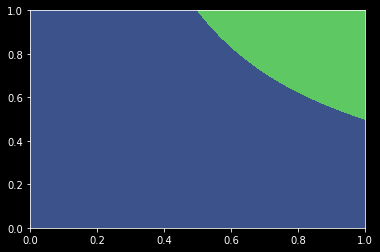

In [20]:
x = y = np.linspace(0,1,50)
x,y = np.meshgrid(x,y)
plt.contourf(x,y,x*y ,levels=[0,1/2,1]);

In [21]:
dblquad(lambda y,x: 1, 1/2,1,lambda x: 1/(2*x),1)[0]

0.15342640972002736

In [22]:
1/2-log(2)/2

0.15342640972002736

## The Moments 

Moment measurements have analogous meaning in the probability context.

The "center of mass" is in fact the **expected value** of the variables.

$$(\bar{x},\bar{y}) = \left( \iint_{\RR^2} x \rho(x,y)\,dA,\iint_{\RR^2} y \rho(x,y)\,dA\right) $$

The second moments (relative to this center) give the **variances** of the respected variables. 

$$(\sigma_x^2,\sigma_{y}^2) = \left( \iint_{\RR^2} (x-\bar{x})^2 \rho(x,y)\,dA,\iint_{\RR^2} (y-\bar{y})^2 \rho(x,y)\,dA\right) $$

The list goes on 

  - mixed moments $\to$ covariance
  - 3rd moments $\to$ skewedness
  - 4th moments $\to$ kurtosis
  - $\ldots$